In [1]:
import os
import re
import docx
import PyPDF2
import io 
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Function to extract text from resume
def getText(filename):
      
    # Create empty string 
    fullText = ''
    if filename.endswith('.docx'):
        doc = docx.Document(filename)
        
        for para in doc.paragraphs:
            fullText = fullText + para.text
            
           
    elif filename.endswith('.pdf'):  
        with open(filename, "rb") as pdf_file:
            pdoc = PyPDF2.PdfFileReader(filename)
            number_of_pages = pdoc.getNumPages()
            page = pdoc.pages[0]
            page_content = page.extractText()
             
        for paragraph in page_content:
            fullText =  fullText + paragraph
            
    else:
        import aspose.words as aw
        output = aw.Document()
        # Remove all content from the destination document before appending.
        output.remove_all_children()
        input = aw.Document(filename)
        # Append the source document to the end of the destination document.
        output.append_document(input, aw.ImportFormatMode.KEEP_SOURCE_FORMATTING)
        output.save("Output.docx");
        doc = docx.Document('Output.docx')
        
        for para in doc.paragraphs:
            fullText = fullText + para.text
        fullText = fullText[79:]
         
    return (fullText)


In [3]:
# Function to remove punctuation and tokenize the text
def tokenText(extText):
   
    # Remove punctuation marks
    punc = '''!()-[]{};:'"\,.<>/?@#$%^&*_~'''
    for ele in extText:
        if ele in punc:
            puncText = extText.replace(ele, "")
            
    # Tokenize the text and remove stop words
    stop_words = set(stopwords.words('english'))
    puncText.split()
    word_tokens = word_tokenize(puncText)
    TokenizedText = [w for w in word_tokens if not w.lower() in stop_words]
    TokenizedText = []
  
    for w in word_tokens:
        if w not in stop_words:
            TokenizedText.append(w)
    return(TokenizedText)

In [4]:
#Define key terms dictionary for fixing Role Applied for 
terms = {'WorkDay ERP':['workday', 'workday consultant', 'workday hcm', 'eib', 'picof', 
                        'workday studio','nnbound/outbound integrations'],
         'Peoplesoft':['peoplesoft', 'pia','ccb','birt','peci','ccw','pum','people tools',
                        'peoplesoft implementation','peoplesoft components',
                        'peoplesoft dba','peoplesoft admin','peoplesoft admin/dba','peopleSoft fscm', 
                        'peopletoolsupgrade','peopletools upgrade','process scheduler servers',
                        'peoplesoft hrms','peopleSoft consultant','peopledoft cloud',
                        'PeopleSoft migrations','eoplesoft Testing Framework','pure internet architecture'],             
         'Database Developer':['sql','sql server', 'ms sql server','msbi', 'sql developer', 'ssis','ssrs',
                        'ssms','t-sql','tsql','Razorsql', 'razor sql','triggers','powerbi','power bi',
                        'oracle sql', 'pl/sql', 'pl\sql','oracle', 'oracle 11g','oledb','cte','ddl',
                        'dml','etl','mariadb','maria db'],
         'Java Developer':['reactjs', 'react js', 'react js developer', 'html', 
                        'css3','xml','javascript','html5','boostrap','jquery', 'redux','php', 'node js',
                        'nodejs','apache','netbeans','nestjs','nest js','react developer','react hooks',
                        'jenkins']}

In [5]:
#List of all key terms to indicate skillset. Include all the key words in the list 
allTerms = ['workday', 'hcm', 'eib', 'picof','workday hcm',
                        'workday studio','nnbound/outbound integrations',
                        'peoplesoft', 'pia','ccb','birt','peci','ccw','pum','people tools',
                        'peoplesoft implementation','peoplesoft components',
                        'peoplesoft dba','peoplesoft admin','peoplesoft admin/dba','peopleSoft fscm', 
                        'peopletoolsupgrade','peopletools upgrade','process scheduler servers',
                        'peoplesoft hrms','peopleSoft consultant','peopledoft cloud',
                        'PeopleSoft migrations','eoplesoft Testing Framework','pure internet architecture',
                        'sql','sql server', 'ms sql server','msbi', 'sql developer', 'ssis','ssrs',
                        'ssms','t-sql','tsql','Razorsql', 'razor sql','triggers','powerbi','power bi',
                        'oracle sql', 'pl/sql', 'pl\sql','oracle', 'oracle 11g','oledb','cte','ddl',
                        'dml','etl','mariadb','maria db','reactjs', 'react js', 'react js developer', 'html', 
                        'css3','xml','javascript','html5','boostrap','jquery', 'redux','php', 'node js',
                        'nodejs','apache','netbeans','nestjs','nest js','react developer','react hooks',
                        'jenkins']

In [6]:
# Function to read the tokenized text and search for the key words to dermine the Role Applied for
def roleApplied (Text):
    
    # covert the text to lower case
    for i in range(len(Text)):
        Text[i] = Text[i].lower()
    
    # Obtain the scores for each area
    for area in terms.keys():
        if area == 'WorkDay ERP':
            for word in terms[area]:
                if word in Text:
                    role = area
                    return (role)
                
        elif area == 'Peoplesoft':
            for word in terms[area]:
                if word in Text:
                    role = area
                    return(role)   
                
        elif area == 'Database Developer':
            for word in terms[area]:
                if word in Text:
                    role =  area
                    return(role)
            
        elif area == 'Java Developer':
             for word in terms[area]:
                if word in Text:
                    role = area
                    return(role)
        else:
            role = "Fresher"
            return(role)
   # return(role)
                    

In [7]:
# Function to extract Name and contact details
def contactDetails(Text):
    name = ''  
    for i in range(0,3):
        name = " ".join([name, Text[i]])
    return(name)

In [8]:
# Function to extract experience details
def expDetails(Text):
    global sent
   
    Text = Text.split()
   
    for i in range(len(Text)-2):
        Text[i].lower()
        
        if Text[i] ==  'years':
            sent =  Text[i-2] + ' ' + Text[i-1] +' ' + Text[i] +' '+ Text[i+1] +' ' + Text[i+2]
            l = re.findall('\d*\.?\d+',sent)
            for i in l:
                a = float(i)
            return(a)
            return (sent)

In [9]:
# Function to extract skill set details
def skillSet(Text):
    t = []
    for i in range(len(Text)):
        if Text[i] in allTerms:
            if Text[i] in t:
                continue
            t.append(Text[i]) 
    return(t)

In [10]:
# Create an empt Data Frame ResumeText with two columns
ResumeText = pd.DataFrame([], columns=['Name','RoleApplied', 'Exp_years', 'SkillSet','TextInfo'])

# Mention the path in your computer where resumes folder is stored
path = "C:\\Users\\lenovo\\OneDrive\\Desktop\\Resume_Project"
text =[]

# Search the directory path and loop through the resume documents and callthe function getText
for filename in os.listdir(path):
    filename = os.path.join(path, filename)
    extText = getText(filename)
    #print(type(extText))
    tokText = tokenText(extText)
    #print(extText)
    role = roleApplied(tokText)
    Name = contactDetails(tokText)
    experience = expDetails(extText)
    skills = skillSet(tokText)
    NewRow = [Name,role,experience, skills,tokText]  
    ResumeText.loc[len(ResumeText)] = NewRow

In [11]:
ResumeText.head(50)

,Name,RoleApplied,Exp_years,SkillSet,TextInfo
0,anil kumar maddukuri,Database Developer,2.40,"[sql, msbi, ssms, ssis, ssrs, triggers, cte, etl]","[anil, kumar, maddukuri, sql, &, msbi, develop..."
1,aradhana tripathicurrent location,Database Developer,4.00,"[sql, mariadb, triggers, ddl, dml, t-sql, ssms]","[aradhana, tripathicurrent, location, :, gachi..."
2,buddha vamsi career,Database Developer,2.11,"[sql, oracle, triggers, cte, etl]","[buddha, vamsi, career, objective, :, have, 21..."
3,chinna subbarayudu mdob,WorkDay ERP,5.10,"[workday, hcm, etl, eib, xml, ccw, picof, peci...","[chinna, subbarayudu, mdob, 06th, march, 1994n..."
4,name : gopi,WorkDay ERP,3.00,"[workday, hcm, eib, picof, xml, birt]","[name, :, gopi, krishna, reddy, professional, ..."
5,vijay reddy2021-11-01hari krishna,WorkDay ERP,NaN,"[workday, hcm, eib, birt, xml, peoplesoft, ora...","[vijay, reddy2021-11-01hari, krishna, msummary..."
6,shashi 2021-11-01harikrishna akula,WorkDay ERP,5.20,"[workday, eib, peoplesoft, xml, ccw, sql, orac...","[shashi, 2021-11-01harikrishna, akula, summary..."
7,siri subramanyam2021-11-01himamenducareer obj...,WorkDay ERP,NaN,"[workday, hcm, eib]","[siri, subramanyam2021-11-01himamenducareer, o..."
8,g himaja career,WorkDay ERP,2.00,"[workday, hcm, eib, html, birt]","[g, himaja, career, objectiveto, work, towards..."
9,name ravali p,None,NaN,[],"[name, ravali, p, curriculum, vitae, specializ..."


In [12]:
ResumeText.tail(50)

,Name,RoleApplied,Exp_years,SkillSet,TextInfo
29,krishna eati2021-11-01profile summary:7+,Peoplesoft,7.0,"[peoplesoft, hcm, pia, oracle]","[krishna, eati2021-11-01profile, summary:7+, y..."
30,peoplesoft database administratormurali2021-1...,Peoplesoft,4.0,"[peoplesoft, oracle, pia, sql, pum, hcm]","[peoplesoft, database, administratormurali2021..."
31,siri subramanyam20211101priyanka ramadoss61/46,Peoplesoft,2016.0,"[peoplesoft, pum, apache]","[siri, subramanyam20211101priyanka, ramadoss61..."
32,kris2021-11-01peoplesoft administratorsriniva...,Peoplesoft,10.0,"[peoplesoft, pia, sql, pum, oracle, hcm]","[kris2021-11-01peoplesoft, administratorsriniv..."
33,vinod2021-11-01vinod akkalapeoplesoft dba,Peoplesoft,NaN,"[peoplesoft, oracle, pia, pum, hcm]","[vinod2021-11-01vinod, akkalapeoplesoft, dba, ..."
34,siddu2021-11-01peoplesoft admin/peoplesoft db...,Peoplesoft,4.4,"[peoplesoft, pum, oracle, pia, hcm]","[siddu2021-11-01peoplesoft, admin/peoplesoft, ..."
35,ashraya r2021-11-01arun venuexperience,Peoplesoft,NaN,[peoplesoft],"[ashraya, r2021-11-01arun, venuexperience, sum..."
36,amar2021-11-01experience summary41 years-,Peoplesoft,2.0,"[peoplesoft, hcm, oracle, sql]","[amar2021-11-01experience, summary41, years-, ..."
37,suryam2021-11-01rahul ahuja --,Peoplesoft,10.2,"[peoplesoft, xml, oracle]","[suryam2021-11-01rahul, ahuja, --, --, --, --,..."
38,rajab b peoplesoft,Peoplesoft,3.2,"[peoplesoft, xml]","[rajab, b, peoplesoft, technical, consultant, ..."


In [13]:
expres = ResumeText[ResumeText['Exp_years']>=4]
expres

,Name,RoleApplied,Exp_years,SkillSet,TextInfo
1,aradhana tripathicurrent location,Database Developer,4.0,"[sql, mariadb, triggers, ddl, dml, t-sql, ssms]","[aradhana, tripathicurrent, location, :, gachi..."
3,chinna subbarayudu mdob,WorkDay ERP,5.1,"[workday, hcm, etl, eib, xml, ccw, picof, peci...","[chinna, subbarayudu, mdob, 06th, march, 1994n..."
6,shashi 2021-11-01harikrishna akula,WorkDay ERP,5.2,"[workday, eib, peoplesoft, xml, ccw, sql, orac...","[shashi, 2021-11-01harikrishna, akula, summary..."
11,home2021-11-01 [ pic,WorkDay ERP,5.7,"[workday, eib, xml, birt, hcm, oracle]","[home2021-11-01, [, pic, ], name, :, j, sumant..."
14,dhwani sdhwani2021-11-01madeeswar aprofile,WorkDay ERP,6.0,"[workday, hcm, etl, eib, xml, ccw, picof, peci]","[dhwani, sdhwani2021-11-01madeeswar, aprofile,..."
15,mooraboyina guravaiahworkday integration,WorkDay ERP,5.0,"[workday, eib, picof, xml, hcm, birt, peoplesoft]","[mooraboyina, guravaiahworkday, integration, s..."
16,siri subramanyam2021-11-01name :,WorkDay ERP,5.0,"[workday, hcm, eib, birt, xml, peoplesoft]","[siri, subramanyam2021-11-01name, :, naresh, b..."
21,muraliexperience summary i,Peoplesoft,6.0,"[peoplesoft, hcm, oracle]","[muraliexperience, summary, i, 6, years, exper..."
23,peoplesoft adminvarkala vikascareer,Peoplesoft,4.2,"[peoplesoft, pum, oracle, pia, hcm]","[peoplesoft, adminvarkala, vikascareer, object..."
24,peoplesoft administration vivekanand,Peoplesoft,7.5,"[peoplesoft, pum, pia, oracle, hcm]","[peoplesoft, administration, vivekanand, sayan..."


In [14]:
ResumeText['RoleApplied'].value_counts()

WorkDay ERP           21
Peoplesoft            20
Database Developer    18
Java Developer        17
Name: RoleApplied, dtype: int64

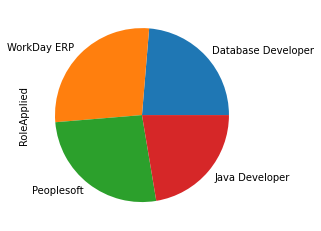

In [15]:
import matplotlib.pyplot as plt
ResumeText['RoleApplied'].value_counts(sort=False).plot.pie()
plt.show()

In [16]:
emptyseries = pd.isnull(ResumeText["RoleApplied"])
#emptyseries.dtype
ResumeText[emptyseries]

,Name,RoleApplied,Exp_years,SkillSet,TextInfo
9,name ravali p,None,NaN,[],"[name, ravali, p, curriculum, vitae, specializ..."
58,venkatalakshmi pedireddysoftware developerexp...,None,NaN,[],"[venkatalakshmi, pedireddysoftware, developere..."
61,deepchandinferno2021-11-01curriculum vitaei h...,None,NaN,[],"[deepchandinferno2021-11-01curriculum, vitaei,..."


In [17]:
emptyseries = pd.isnull(ResumeText['Exp_years'])
#emptyseries.dtype
ResumeText[emptyseries]

,Name,RoleApplied,Exp_years,SkillSet,TextInfo
5,vijay reddy2021-11-01hari krishna,WorkDay ERP,NaN,"[workday, hcm, eib, birt, xml, peoplesoft, ora...","[vijay, reddy2021-11-01hari, krishna, msummary..."
7,siri subramanyam2021-11-01himamenducareer obj...,WorkDay ERP,NaN,"[workday, hcm, eib]","[siri, subramanyam2021-11-01himamenducareer, o..."
9,name ravali p,None,NaN,[],"[name, ravali, p, curriculum, vitae, specializ..."
10,susovan bag seeking,Database Developer,NaN,"[html, sql]","[susovan, bag, seeking, challenging, position,..."
18,resumename neeraj mishrahaving,Database Developer,NaN,"[oracle, sql, pl/sql, triggers, ddl, dml]","[resumename, neeraj, mishrahaving, 3, year, 6,..."
20,anubhav kumar singh,Peoplesoft,NaN,"[peoplesoft, hcm, pum, jenkins, oracle, pia]","[anubhav, kumar, singh, to, work, globally, co..."
22,profile summaryi overall,Peoplesoft,NaN,"[peoplesoft, hcm, oracle, pum, pia, sql]","[profile, summaryi, overall, 6.8, years, ’, ex..."
27,career objective pursuing,Peoplesoft,NaN,"[peoplesoft, oracle, sql, pia]","[career, objective, pursuing, peoplesoft, exec..."
33,vinod2021-11-01vinod akkalapeoplesoft dba,Peoplesoft,NaN,"[peoplesoft, oracle, pia, pum, hcm]","[vinod2021-11-01vinod, akkalapeoplesoft, dba, ..."
35,ashraya r2021-11-01arun venuexperience,Peoplesoft,NaN,[peoplesoft],"[ashraya, r2021-11-01arun, venuexperience, sum..."


In [18]:
resumeDF = pd.DataFrame([ResumeText.SkillSet, ResumeText.RoleApplied]).transpose()
resumeDF

,SkillSet,RoleApplied
0,"[sql, msbi, ssms, ssis, ssrs, triggers, cte, etl]",Database Developer
1,"[sql, mariadb, triggers, ddl, dml, t-sql, ssms]",Database Developer
2,"[sql, oracle, triggers, cte, etl]",Database Developer
3,"[workday, hcm, etl, eib, xml, ccw, picof, peci...",WorkDay ERP
4,"[workday, hcm, eib, picof, xml, birt]",WorkDay ERP
...,...,...
74,"[workday, hcm, eib, xml, peci, peoplesoft]",WorkDay ERP
75,"[sql, cte, t-sql, triggers]",Database Developer
76,"[workday, hcm, birt, eib, xml]",WorkDay ERP
77,"[workday, hcm, eib, xml, peoplesoft]",WorkDay ERP


In [19]:
# Display null value rows
df1 = resumeDF[resumeDF.isna().any(axis=1)]
df1

,SkillSet,RoleApplied
9,[],None
58,[],None
61,[],None


In [20]:
#Delete null vaue rows
resumeDF = resumeDF.dropna(how='any',axis=0) 
resumeDF.tail(20)

,SkillSet,RoleApplied
57,"[html, html5, css3, javascript, jquery]",Java Developer
59,"[javascript, oracle]",Database Developer
60,"[reactjs, javascript, html5, css3, html, redux]",Java Developer
62,"[redux, html, jquery, javascript]",Java Developer
63,"[html, javascript, jquery, php]",Java Developer
64,"[html, javascript, jquery, php]",Java Developer
65,"[html, redux, javascript]",Java Developer
66,[html],Java Developer
67,"[reactjs, redux, javascript, html5]",Java Developer
68,"[reactjs, javascript, html, html5, css3]",Java Developer


In [21]:
# Labelling of target variable "RoleApplied"
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
resumeDF['RoleApplied']= label_encoder.fit_transform(resumeDF['RoleApplied'])
  
resumeDF['RoleApplied'].unique()

C:\Users\lenovo\AppData\Local\Temp/ipykernel_40388/2876420441.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resumeDF['RoleApplied']= label_encoder.fit_transform(resumeDF['RoleApplied'])


array([0, 3, 2, 1])

In [22]:
resumeDF.tail(20)

,SkillSet,RoleApplied
57,"[html, html5, css3, javascript, jquery]",1
59,"[javascript, oracle]",0
60,"[reactjs, javascript, html5, css3, html, redux]",1
62,"[redux, html, jquery, javascript]",1
63,"[html, javascript, jquery, php]",1
64,"[html, javascript, jquery, php]",1
65,"[html, redux, javascript]",1
66,[html],1
67,"[reactjs, redux, javascript, html5]",1
68,"[reactjs, javascript, html, html5, css3]",1


In [23]:
#One hot encoding of SkillSet column
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
resumeDF = resumeDF.join(pd.DataFrame(mlb.fit_transform(resumeDF.pop('SkillSet')),
                          columns=mlb.classes_,
                          index=resumeDF.index))

In [24]:
resumeDF

,RoleApplied,apache,birt,ccb,ccw,css3,cte,ddl,dml,eib,...,redux,sql,ssis,ssms,ssrs,t-sql,triggers,tsql,workday,xml
0,0,0,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,1,0,0,0
1,0,0,0,0,0,0,0,1,1,0,...,0,1,0,1,0,1,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,3,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,1
4,3,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,3,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
75,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
76,3,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
77,3,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1


In [25]:
resCols = resumeDF.columns.tolist()

In [26]:
resCols1 = resCols[:1]
del resCols[0]
resCols2  = resCols + resCols1
resCols1

['RoleApplied']

In [27]:
resumeDF = resumeDF[resCols2]
resumeDF.tail(50)

,apache,birt,ccb,ccw,css3,cte,ddl,dml,eib,etl,...,sql,ssis,ssms,ssrs,t-sql,triggers,tsql,workday,xml,RoleApplied
27,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
28,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
30,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
31,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
32,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
33,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
34,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
36,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2


In [28]:
# Import Data Pre-processing Libraries

from sklearn.model_selection import train_test_split

# Separate the data set columns in to dependant and independant variables
X = resumeDF.drop('RoleApplied',axis=1).values
y = resumeDF['RoleApplied'].values

# Split the dataset into train test parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score,accuracy_score

In [30]:
# Modelling with Logistic Regression
model1 =(LogisticRegression(max_iter=1000))

In [31]:
model1.fit(X_train, y_train)
results2 = model1.predict(X_test)
results1 = model1.predict(X_train)
score1 = precision_score(y_train, results1,average='macro')
score2 = precision_score(y_test, results2,average='macro')
print(score2)

1.0


In [32]:
cm1 = metrics.confusion_matrix(y_train, results1)
print(cm1)

[[15  0  0  0]
 [ 0 14  0  0]
 [ 0  0 14  0]
 [ 0  0  0 17]]


In [33]:
cm2 = metrics.confusion_matrix(y_test, results2)
print(cm2)

[[3 0 0 0]
 [0 3 0 0]
 [0 0 6 0]
 [0 0 0 4]]


In [34]:
# Modelling with SVC()
from sklearn.svm import SVC
model2 = (SVC())
model2.fit(X_train, y_train)
results_train = model2.predict(X_train)
results_test = model2.predict(X_test)
score_train = precision_score(y_train, results_train,average='macro')
score_test = precision_score(y_test, results_test,average='macro')

In [35]:
score_train

1.0

In [36]:
score_test

1.0

In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
model3 = GaussianNB()
model3.fit(X_train, y_train)
res_train = model3.predict(X_train)
res_test = model3.predict(X_test)
s_train = precision_score(y_train, res_train,average='macro')
s_test = precision_score(y_test, res_test,average='macro')

In [39]:
s_train

1.0

In [40]:
s_test

1.0

In [41]:
ResumeText.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         79 non-null     object 
 1   RoleApplied  76 non-null     object 
 2   Exp_years    57 non-null     float64
 3   SkillSet     79 non-null     object 
 4   TextInfo     79 non-null     object 
dtypes: float64(1), object(4)
memory usage: 5.8+ KB
